<a href="https://colab.research.google.com/github/flybiubiu/cs231n/blob/master/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/nholmber/google-colab-cs231n.git
%cd google-colab-cs231n/assignment1
!pip install imageio
%cd cs231n/datasets/
!/content/google-colab-cs231n/assignment1/cs231n/datasets/get_datasets.sh
%cd '/content/google-colab-cs231n/assignment1'

Cloning into 'google-colab-cs231n'...
remote: Enumerating objects: 109, done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 109
Receiving objects: 100% (109/109), 5.07 MiB | 7.30 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/google-colab-cs231n/assignment1
/content/google-colab-cs231n/assignment1/cs231n/datasets
--2019-11-18 13:07:06--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  31.1MB/s    in 5.8s    

2019-11-18 13:07:12 (28.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-b

In [0]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

In [0]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  mask = np.random.choice(num_training, num_dev, replace = False)
  X_dev = X_train[mask]
  y_dev = y_train[mask]
  X_train = np.reshape(X_train, (X_train.shape[0], -1))
  X_val = np.reshape(X_val, (X_val.shape[0], -1))
  X_test = np.reshape(X_test, (X_test.shape[0], -1))
  X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image
  X_dev -= mean_image

  X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
  X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
  X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
  X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
  
  return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('dev data shape: ', X_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


In [11]:
from cs231n.classifiers.softmax import softmax_loss_naive
import time
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)
print ('loss: %f' % loss)
print ('sanity check: %f' % (-np.log(0.1)))

loss: 2.370042
sanity check: 2.302585


In [14]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)
from cs231n.gradient_check import grad_check_sparse
f = lambda w:softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w:softmax_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -1.071176 analytic: -1.071176, relative error: 3.561998e-09
numerical: 0.521847 analytic: 0.521847, relative error: 4.498267e-08
numerical: 3.042251 analytic: 3.042251, relative error: 4.276982e-08
numerical: -1.626411 analytic: -1.626411, relative error: 7.078199e-08
numerical: 0.996490 analytic: 0.996490, relative error: 9.116305e-08
numerical: -3.081723 analytic: -3.081723, relative error: 9.637506e-09
numerical: 1.464373 analytic: 1.464372, relative error: 1.157633e-08
numerical: 2.649159 analytic: 2.649159, relative error: 1.327390e-08
numerical: -3.727438 analytic: -3.727438, relative error: 8.554566e-09
numerical: -1.137318 analytic: -1.137318, relative error: 3.157709e-08
numerical: -0.743844 analytic: -0.743844, relative error: 4.570900e-08
numerical: 2.792790 analytic: 2.792790, relative error: 1.917657e-08
numerical: 2.178340 analytic: 2.178340, relative error: 2.353768e-08
numerical: -3.733203 analytic: -3.733203, relative error: 6.917617e-10
numerical: -1.733877

In [17]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('naive loss: %e computed in %f s' % (loss_naive, toc - tic))
from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print ('vectorized loss: %e computed in %f s' % (loss_vectorized, toc - tic))

naive loss: 2.370042e+00 computed in 0.202183 s
vectorized loss: 2.370042e+00 computed in 0.021293 s


In [23]:
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [5e4, 1e6]
pass
from cs231n.classifiers.linear_classifier import Softmax
for lr in learning_rates:
  for rs in regularization_strengths:
    softmax = Softmax()
    softmax.train(X_train, y_train, learning_rate = lr, reg = rs, num_iters = 1500, verbose = True)
    y_pred_train = softmax.predict(X_train)
    acc_train = np.mean(y_pred_train == y_train)
    y_pred_val = softmax.predict(X_val)
    acc_val = np.mean(y_pred_val == y_val)
    results[(lr, rs)] = (acc_train, acc_val)


    if acc_val > best_val:
      best_val = acc_val
      best_softmax = softmax

for lr, reg in sorted(results):
  train_accuracy, val_accuracy = results[(lr, reg)]
  print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 1538.303014
iteration 100 / 1500: loss 206.855240
iteration 200 / 1500: loss 29.523376
iteration 300 / 1500: loss 5.799574
iteration 400 / 1500: loss 2.626472
iteration 500 / 1500: loss 2.184461
iteration 600 / 1500: loss 2.102109
iteration 700 / 1500: loss 2.104714
iteration 800 / 1500: loss 2.081194
iteration 900 / 1500: loss 2.145875
iteration 1000 / 1500: loss 2.137854
iteration 1100 / 1500: loss 2.184789
iteration 1200 / 1500: loss 2.093404
iteration 1300 / 1500: loss 2.099867
iteration 1400 / 1500: loss 2.166226
iteration 0 / 1500: loss 30644.937338
iteration 100 / 1500: loss 2.283388
iteration 200 / 1500: loss 2.281703
iteration 300 / 1500: loss 2.287055
iteration 400 / 1500: loss 2.283273
iteration 500 / 1500: loss 2.287112
iteration 600 / 1500: loss 2.286384
iteration 700 / 1500: loss 2.274594
iteration 800 / 1500: loss 2.285269
iteration 900 / 1500: loss 2.283423
iteration 1000 / 1500: loss 2.284579
iteration 1100 / 1500: loss 2.286394
iteration 1200 

In [25]:
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print ('softmax on raw pixels final test set accuracy: %f' % (test_accuracy))

softmax on raw pixels final test set accuracy: 0.313000


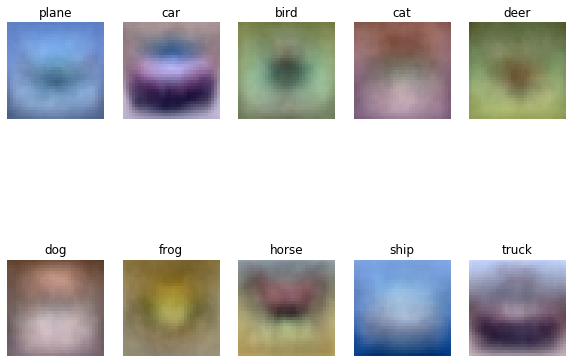

In [27]:
w = best_softmax.W[:-1,:]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.subplot(2, 5, i + 1)
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])